## Process the data

In [3]:
import urllib
import os,sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn import feature_extraction
from sklearn import preprocessing
from sklearn import metrics
from random import seed, shuffle

In [4]:
import pyreadr

result = pyreadr.read_r('~/Desktop/matlab_scripts/dfAlps2.Rdata') # also works for Rds

print(result.keys())
df = result["dfAlps2"]
print(df.head())

odict_keys(['dfAlps2'])
          longitude  latitude        date  heure  minute  seconde  \
rownames                                                            
4103         4.0944   44.1392  20110109.0   13.0    49.0     26.0   
4118         4.1949   43.7687  20110109.0   15.0     1.0     29.0   
4119         4.1713   44.0176  20110109.0   15.0     1.0     29.0   
4121         4.2447   44.0208  20110109.0   15.0     3.0     57.0   
4127         4.2613   44.0264  20110109.0   15.0    26.0     27.0   

           nanoseconde  
rownames                
4103      7.127392e+10  
4118      6.526186e+10  
4119      7.320074e+10  
4121      1.459529e+10  
4127      6.824676e+10  


In [9]:
def visualiseData(data, kde=True):
  nb_plots = 0
  dataCTypes = data.dtypes
  for i in dataCTypes:
    if (i=="float64" or i=="int64"):
      nb_plots+=1
  x = 7
  y = math.ceil(nb_plots/x)
  w=0
  plt.figure(figsize=(x * x, nb_plots))
  for i, k in enumerate(data.keys()):
    if(dataCTypes[k]=="float64" or dataCTypes[k]=="int64"):
      ax = plt.subplot(x, y, w + 1, xticklabels=[])
      ax.set_title("Distribution of '{0}': {1} in [{2},{3}]".format(
          k, len(data[k].unique()), data[k].min(), data[k].max()))
      ax = sns.histplot(data[k], kde=kde and len(data[k].unique()) > 5)
      ax.set_xlabel("")
      w+=1

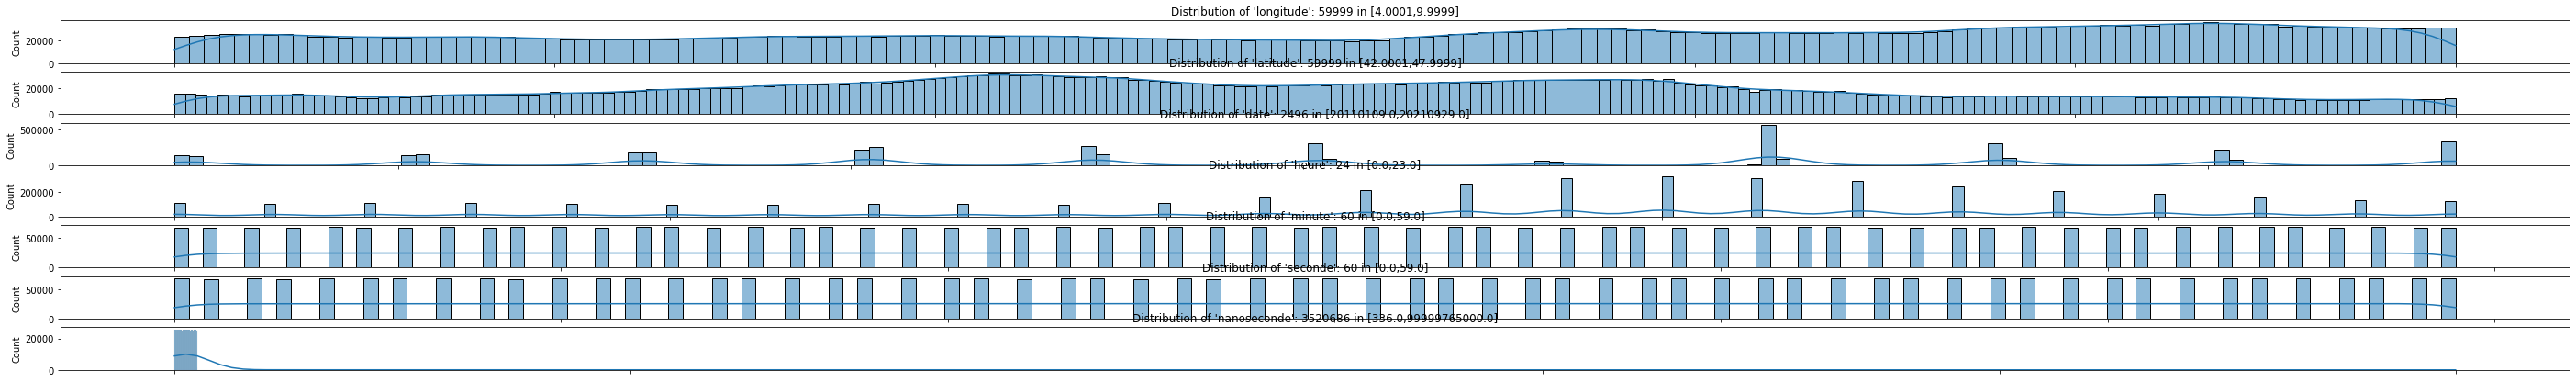

In [10]:
visualiseData(df)